In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from numpy.random import normal, poisson

from graspologic.simulations import sbm
from graspologic.embed import LaplacianSpectralEmbed as LSE
from graspologic.embed import AdjacencySpectralEmbed as ASE
from graspologic.plot import heatmap, pairplot
from graspologic.utils import remove_vertices

from scipy.linalg import orthogonal_procrustes

np.random.seed(1)

# Tutorial
### This is a reproduction of Alex's Out of Sample ASE [Tutorial](https://microsoft.github.io/graspologic/tutorials/embedding/OutOfSampleEmbed.html). 
Generate a graph with some known latent positions

A.shape= (399, 399) a.shape= (1, 399)


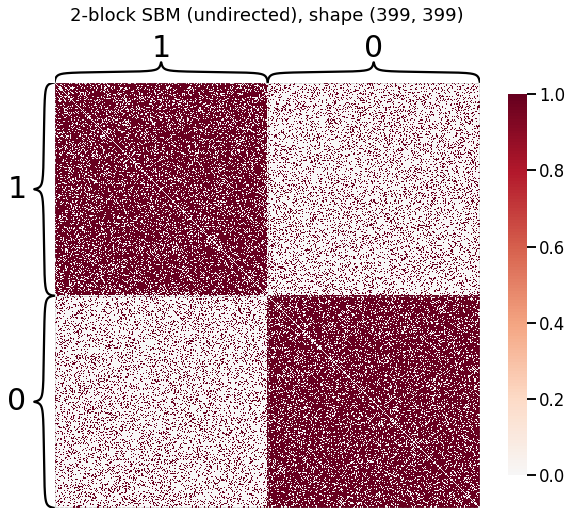

In [3]:
# Generate parameters
nodes_per_community = 200
P = np.array([[0.8, 0.2],
              [0.2, 0.8]])
latents = np.repeat(P, nodes_per_community, axis=0)

# Generate an undirected Stochastic Block Model (SBM)
undirected, labels_ = sbm(2*[nodes_per_community], P, return_labels=True)
labels = list(labels_)

# Grab out-of-sample vertices
oos_idx = 0
oos_labels = labels.pop(oos_idx)
A, a = remove_vertices(undirected, indices=[oos_idx], return_removed=True)
print("A.shape=", A.shape, "a.shape=", a.shape)
# plot our SBM
heatmap(A, title=f'2-block SBM (undirected), shape {A.shape}', inner_hier_labels=labels);

In [7]:
lse = LSE(n_components=2)
X_hat = lse.fit_transform(A)
print("first rown in X_hat = ", X_hat[0])
# predicted latent positions
w = lse.transform(a)/nodes_per_community
print("OOS embedding = ", w)

first rown in X_hat =  [0.05085177 0.04119807]
OOS embedding =  [[0.0505929  0.03933546]]


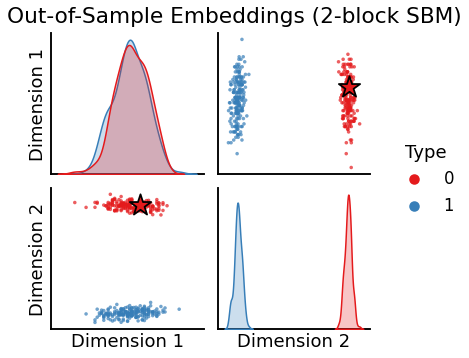

In [8]:
def plot_oos(X_hat, oos_vertices, labels, oos_labels, title):
    # Plot the in-sample latent positions
    plot = pairplot(X_hat, labels=labels, title=title)

    # generate an out-of-sample dataframe
    oos_vertices = np.atleast_2d(oos_vertices)
    data = {'Type': oos_labels,
          'Dimension 1': oos_vertices[:, 0],
          'Dimension 2': oos_vertices[:, 1]}
    oos_df = pd.DataFrame(data=data)

    # update plot with out-of-sample latent positions,
    # plotting out-of-sample latent positions as stars
    plot.data = oos_df
    plot.hue_vals = oos_df["Type"]
    plot.map_offdiag(sns.scatterplot, s=500,
                     marker="*", edgecolor="black")
    plot.tight_layout()
    return plot

# Plot all latent positions
plot_oos(X_hat, w, labels=labels, oos_labels=[0], title="Out-of-Sample Embeddings (2-block SBM)");